In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

In [2]:
df=pd.read_csv("players_22.csv")

In [3]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
df.shape

(7244, 110)

In [5]:
df.tail()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
7239,244210,https://sofifa.com/player/244210/jaime-suarez-...,Jimmy,Jaime Suárez Juesas,"CDM, CM",68,75,2300000.0,4000.0,24,...,62+2,62+2,62+2,66+2,17+2,https://cdn.sofifa.net/players/244/210/22_120.png,https://cdn.sofifa.net/teams/110827/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/es.png
7240,244344,https://sofifa.com/player/244344/giannis-masou...,G. Masouras,Giannis Masouras,"RB, RM",68,72,1600000.0,500.0,24,...,62+2,62+2,62+2,66+2,16+2,https://cdn.sofifa.net/players/244/344/22_120.png,https://cdn.sofifa.net/teams/100646/60.png,https://cdn.sofifa.net/flags/nl.png,NaN,https://cdn.sofifa.net/flags/gr.png
7241,244363,https://sofifa.com/player/244363/daniel-cerant...,Daniel Fuzato,Daniel Cerântula Fuzato,GK,68,74,1500000.0,11000.0,23,...,21+2,21+2,21+2,20+2,67+2,https://cdn.sofifa.net/players/244/363/22_120.png,https://cdn.sofifa.net/teams/52/60.png,https://cdn.sofifa.net/flags/it.png,NaN,https://cdn.sofifa.net/flags/br.png
7242,244399,https://sofifa.com/player/244399/timothe-cogna...,T. Cognat,Timothé Cognat,"CM, CDM, LM",68,74,1900000.0,7000.0,23,...,62+2,62+2,62+2,66+2,15+2,https://cdn.sofifa.net/players/244/399/22_120.png,https://cdn.sofifa.net/teams/324/60.png,https://cdn.sofifa.net/flags/ch.png,NaN,https://cdn.sofifa.net/flags/fr.png
7243,244464,https://sofifa.com/player/244464/eryc-castillo...,E. Castillo,Eryc Leonel Castillo Arroyo,"RM, LM, ST",68,69,1400000.0,9000.0,26,...,46+2,46+2,46+2,51+2,17+2,https://cdn.sofifa.net/players/244/464/22_120.png,https://cdn.sofifa.net/teams/111678,NaN,NaN,NaN


In [6]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [7]:
df.isnull().sum()

sofifa_id              0
player_url             0
short_name             0
long_name              0
player_positions       0
                    ... 
player_face_url        0
club_logo_url         39
club_flag_url         40
nation_logo_url     6573
nation_flag_url        1
Length: 110, dtype: int64

In [8]:
# nation_logo_url contains so many missing value lets drop this column

In [9]:
df.drop("nation_logo_url",axis=1)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,62+3,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,75+3,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,244210,https://sofifa.com/player/244210/jaime-suarez-...,Jimmy,Jaime Suárez Juesas,"CDM, CM",68,75,2300000.0,4000.0,24,...,66+2,62+2,62+2,62+2,66+2,17+2,https://cdn.sofifa.net/players/244/210/22_120.png,https://cdn.sofifa.net/teams/110827/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/flags/es.png
7240,244344,https://sofifa.com/player/244344/giannis-masou...,G. Masouras,Giannis Masouras,"RB, RM",68,72,1600000.0,500.0,24,...,66+2,62+2,62+2,62+2,66+2,16+2,https://cdn.sofifa.net/players/244/344/22_120.png,https://cdn.sofifa.net/teams/100646/60.png,https://cdn.sofifa.net/flags/nl.png,https://cdn.sofifa.net/flags/gr.png
7241,244363,https://sofifa.com/player/244363/daniel-cerant...,Daniel Fuzato,Daniel Cerântula Fuzato,GK,68,74,1500000.0,11000.0,23,...,20+2,21+2,21+2,21+2,20+2,67+2,https://cdn.sofifa.net/players/244/363/22_120.png,https://cdn.sofifa.net/teams/52/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/br.png
7242,244399,https://sofifa.com/player/244399/timothe-cogna...,T. Cognat,Timothé Cognat,"CM, CDM, LM",68,74,1900000.0,7000.0,23,...,66+2,62+2,62+2,62+2,66+2,15+2,https://cdn.sofifa.net/players/244/399/22_120.png,https://cdn.sofifa.net/teams/324/60.png,https://cdn.sofifa.net/flags/ch.png,https://cdn.sofifa.net/flags/fr.png


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7244 entries, 0 to 7243
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 6.1+ MB


In [11]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,7244.000000,7244.000000,7244.000000,7.200000e+03,7205.000000,7244.000000,7244.000000,7244.000000,7205.000000,7205.000000,...,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,691.000000
mean,217098.997377,72.653644,75.077996,6.364026e+06,20248.639833,27.413308,181.466317,75.917863,36939.750729,1.167384,...,66.708586,52.737162,53.296245,50.564467,16.512562,16.272639,16.125483,16.430149,16.630729,42.571635
std,25422.967770,4.018217,4.944688,1.157879e+07,28263.119952,4.134501,6.860725,7.106846,51046.321317,0.399565,...,9.580629,20.925420,22.428755,22.353346,18.691512,17.903420,17.397232,18.412975,19.139760,9.469341
min,41.000000,68.000000,68.000000,1.300000e+05,500.000000,17.000000,156.000000,54.000000,1.000000,1.000000,...,12.000000,4.000000,7.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,202193.500000,70.000000,71.000000,1.600000e+06,6000.000000,24.000000,177.000000,71.000000,241.000000,1.000000,...,62.000000,34.000000,32.000000,29.000000,8.000000,8.000000,8.000000,8.000000,8.000000,36.000000
50%,221368.500000,72.000000,74.000000,2.600000e+06,11000.000000,27.000000,182.000000,75.000000,1746.000000,1.000000,...,68.000000,62.000000,65.000000,61.000000,11.000000,11.000000,11.000000,11.000000,11.000000,43.000000
75%,234929.250000,75.000000,78.000000,5.500000e+06,24000.000000,30.000000,186.000000,80.000000,110062.000000,1.000000,...,73.000000,70.000000,72.000000,69.250000,14.000000,14.000000,14.000000,14.000000,14.000000,49.000000
max,264465.000000,93.000000,95.000000,1.940000e+08,350000.000000,43.000000,202.000000,104.000000,115716.000000,3.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


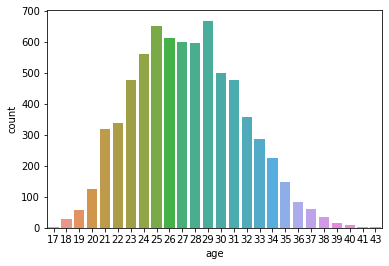

In [12]:
sns.countplot(x="age",data=df)

In [13]:
df.groupby("player_positions")['age'].mean()

player_positions
CAM             27.607143
CAM, CDM        28.500000
CAM, CDM, CM    29.000000
CAM, CDM, LM    28.000000
CAM, CF         27.111111
                  ...    
ST, RM, RW      27.666667
ST, RW          27.805556
ST, RW, CAM     27.500000
ST, RW, LW      26.866667
ST, RW, RM      27.000000
Name: age, Length: 487, dtype: float64

In [14]:
# conclusion:most of the players playing this year of age(20-30)

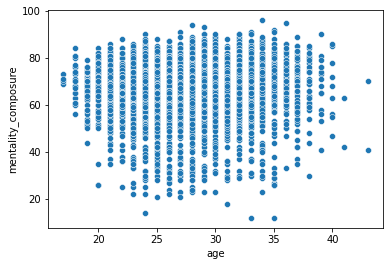

In [15]:
sns.scatterplot(x="age",y="mentality_composure",data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


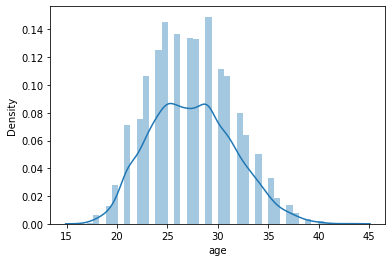

In [16]:
sns.distplot(df['age'])

In [17]:
# finding numerical columns

In [18]:
numerical_col=[col for col in df.columns if (df[col]).dtype != "O"]

In [19]:
numerical_col

['sofifa_id',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'league_level',
 'club_jersey_number',
 'club_contract_valid_until',
 'nationality_id',
 'nation_team_id',
 'nation_jersey_number',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'release_clause_eur',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure'

In [20]:
# number of numerical variables out of total varaiables:
len(numerical_col)


60

In [21]:
# categorical variables

In [22]:
cat_varaiables=[col for col in df.columns if (df[col]).dtype=="O"]

In [23]:
cat_varaiables

['player_url',
 'short_name',
 'long_name',
 'player_positions',
 'dob',
 'club_name',
 'league_name',
 'club_position',
 'club_loaned_from',
 'club_joined',
 'nationality_name',
 'nation_position',
 'preferred_foot',
 'work_rate',
 'body_type',
 'real_face',
 'player_tags',
 'player_traits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_logo_url',
 'nation_flag_url']

In [24]:
len(cat_varaiables)

50

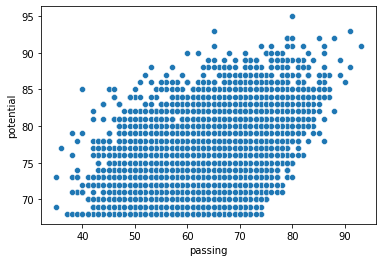

In [25]:

sns.scatterplot(x="passing",y="potential",data=df)

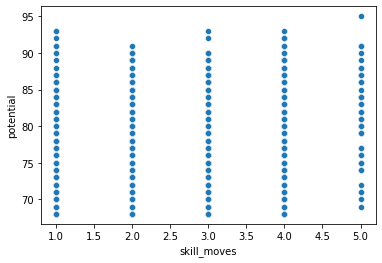

In [26]:
sns.scatterplot(x="skill_moves",y="potential",data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


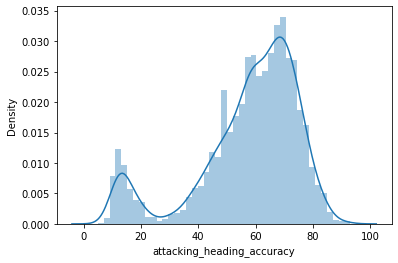

In [27]:
sns.distplot(df["attacking_heading_accuracy"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


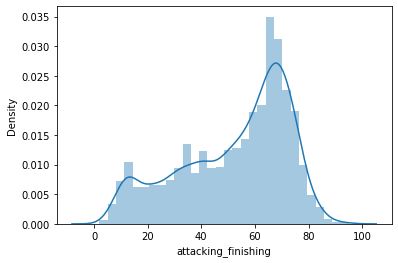

In [28]:
sns.distplot(df["attacking_finishing"])

In [29]:
df.groupby("club_name")["potential"].mean()

club_name
1. FC Heidenheim 1846        71.933333
1. FC Kaiserslautern         68.000000
1. FC Köln                   75.869565
1. FC Magdeburg              71.000000
1. FC Nürnberg               72.285714
                               ...    
Örebro SK                    68.500000
Östersunds FK                69.000000
İstanbul Başakşehir FK       73.900000
İttifak Holding Konyaspor    71.461538
Śląsk Wrocław                68.000000
Name: potential, Length: 606, dtype: float64

In [30]:
df.groupby("skill_moves")["potential"].mean()

skill_moves
1    74.917511
2    74.317295
3    74.679748
4    77.956296
5    81.941176
Name: potential, dtype: float64

In [31]:
# skill_moves:5 -highest potential

In [32]:
df.groupby("body_type")["potential"].mean()

body_type
Lean (170-)         74.985294
Lean (170-185)      75.657692
Lean (185+)         76.159677
Normal (170-)       74.673228
Normal (170-185)    74.427181
Normal (185+)       74.669190
Stocky (170-)       74.481481
Stocky (170-185)    74.057823
Stocky (185+)       74.724551
Unique              85.940299
Name: potential, dtype: float64

In [34]:
df.groupby("nationality_name")["wage_eur"].mean()

nationality_name
Albania                19380.952381
Algeria                29264.705882
Angola                 14400.000000
Antigua and Barbuda     8000.000000
Argentina              14419.908257
                           ...     
Uzbekistan             23333.333333
Venezuela              13448.611111
Wales                  27805.555556
Zambia                 41500.000000
Zimbabwe               23500.000000
Name: wage_eur, Length: 134, dtype: float64

In [36]:
df.groupby("goalkeeping_reflexes")["potential"].mean()

goalkeeping_reflexes
2     76.000000
3     75.833333
4     76.230769
5     76.930818
6     75.418468
7     75.393241
8     75.163447
9     74.989346
10    75.141707
11    74.789954
12    74.864238
13    75.360129
14    75.268868
15    74.808943
16    73.282511
17    70.428571
18    71.800000
19    70.000000
20    81.000000
23    70.000000
34    69.000000
37    88.000000
63    71.000000
64    68.000000
65    68.333333
66    69.250000
67    70.266667
68    70.789474
69    71.083333
70    71.437500
71    72.122449
72    72.405405
73    73.535211
74    74.093333
75    74.618182
76    75.500000
77    76.285714
78    77.708333
79    77.551724
80    78.500000
81    80.230769
82    81.571429
83    80.750000
84    82.583333
85    82.750000
86    84.285714
87    85.000000
88    89.750000
89    89.000000
90    90.000000
Name: potential, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


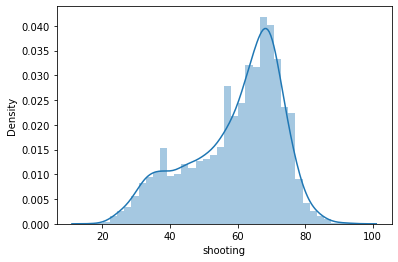

In [37]:
sns.distplot(df["shooting"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


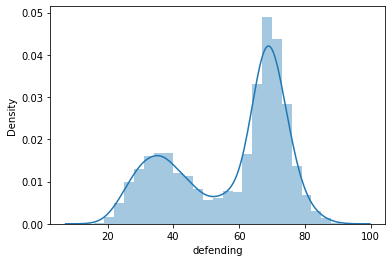

In [38]:
sns.distplot(df["defending"])

In [39]:
df.corr()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
sofifa_id,1.000000,-0.157625,0.264103,0.031007,-0.113688,-0.764843,-0.100810,-0.170871,0.000331,-0.070698,...,-0.157064,0.012684,0.042301,0.045498,-0.149802,-0.154839,-0.152128,-0.159354,-0.147609,-0.200005
overall,-0.157625,1.000000,0.747076,0.770794,0.738659,0.055447,0.040806,0.050962,-0.269466,-0.244947,...,0.479453,0.113245,0.097357,0.079721,0.047925,0.050196,0.046501,0.049505,0.049460,0.274886
potential,0.264103,0.747076,1.000000,0.684426,0.573986,-0.481680,0.026659,-0.046881,-0.321950,-0.208378,...,0.318886,0.088593,0.093284,0.078312,-0.001735,-0.001948,-0.003601,-0.004851,-0.000747,0.150515
value_eur,0.031007,0.770794,0.684426,1.000000,0.797197,-0.155907,0.009440,-0.001788,-0.214535,-0.149803,...,0.385845,0.084792,0.075676,0.057621,-0.027851,-0.028009,-0.026445,-0.029349,-0.025206,0.163802
wage_eur,-0.113688,0.738659,0.573986,0.797197,1.000000,-0.017178,0.032806,0.032101,-0.270723,-0.144661,...,0.394823,0.102479,0.093807,0.074305,-0.034823,-0.034393,-0.034237,-0.035864,-0.033431,0.212818
age,-0.764843,0.055447,-0.481680,-0.155907,-0.017178,1.000000,0.081225,0.190830,0.177107,0.019296,...,0.058189,-0.025562,-0.055156,-0.051050,0.165892,0.170649,0.169347,0.178020,0.164570,0.131588
height_cm,-0.100810,0.040806,0.026659,0.009440,0.032806,0.081225,1.000000,0.783094,-0.127300,0.050896,...,-0.221624,-0.066975,-0.072517,-0.070222,0.366256,0.365772,0.359087,0.366107,0.365289,-0.178447
weight_kg,-0.170871,0.050962,-0.046881,-0.001788,0.032101,0.190830,0.783094,1.000000,-0.055954,0.016986,...,-0.193651,-0.086411,-0.097455,-0.094142,0.341702,0.341042,0.338096,0.346117,0.341580,-0.064533
club_team_id,0.000331,-0.269466,-0.321950,-0.214535,-0.270723,0.177107,-0.127300,-0.055954,1.000000,-0.082721,...,-0.120850,-0.077100,-0.081374,-0.071436,-0.013357,-0.013364,-0.014788,-0.009680,-0.009305,-0.087206
league_level,-0.070698,-0.244947,-0.208378,-0.149803,-0.144661,0.019296,0.050896,0.016986,-0.082721,1.000000,...,-0.130790,-0.019489,-0.014015,-0.011041,0.004824,0.007204,0.002012,0.002813,0.002200,-0.003855


In [41]:
df.isna().sum()

sofifa_id              0
player_url             0
short_name             0
long_name              0
player_positions       0
                    ... 
player_face_url        0
club_logo_url         39
club_flag_url         40
nation_logo_url     6573
nation_flag_url        1
Length: 110, dtype: int64

In [44]:
df.groupby("international_reputation")["potential"].mean()

international_reputation
1    74.216814
2    77.486752
3    81.746479
4    85.438596
5    90.250000
Name: potential, dtype: float64

In [45]:
df.groupby("international_reputation")["wage_eur"].mean()

international_reputation
1     13497.860688
2     35548.226601
3     73290.780142
4    153368.421053
5    191500.000000
Name: wage_eur, dtype: float64

In [46]:
df.groupby("international_reputation")["value_eur"].mean()

international_reputation
1    3.806038e+06
2    1.187910e+07
3    2.833461e+07
4    5.316316e+07
5    6.950000e+07
Name: value_eur, dtype: float64

In [47]:
# Sweetviz library

In [48]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 71.2 MB/s eta 0:00:00


In [49]:

import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [50]:
df["nationality_name"].value_counts()

Brazil                   663
Spain                    619
Argentina                545
France                   438
England                  415
                        ... 
Fiji                       1
Saint Kitts and Nevis      1
Tanzania                   1
Dominican Republic         1
Azerbaijan                 1
Name: nationality_name, Length: 134, dtype: int64

In [51]:
df["club_name"].value_counts()

Real Betis Balompié        29
Paris Saint-Germain        28
SL Benfica                 28
FC Barcelona               27
Chelsea                    27
                           ..
Viktoria Köln               1
Odisha FC                   1
Club Atlético Palmaflor     1
Dundee FC                   1
Östersunds FK               1
Name: club_name, Length: 606, dtype: int64